# Data Visualization Part 2: Student Project
## Matriculation Number: 813710
## Name: SAHELI SAHA


The final project consists of a visualization and a text exercise. For this project you need to:

* perform all exercises in a Jupyter notebook
* write Python code to visualize the given data
* comment your code to describe what your code does
* recreate the example figures
* export the final notebook to an html and upload it to iLearn
* don't forget to add your matriculation number to the Jupyter notebook

## 1: Visualization Exercise

Here, three alternative visualizations of the same artificial data shall be created by you. All plots display fictitious genomic annotations together with fictitious RNA binding protein data. The visualizations shall display RNA binding protein signals and link these binding information to genomic annotations to shed light on potential biological function. For each version a reference is shown. Two different datasets are provided:

* *10_project_data_annotations.csv*
* *10_project_data_signals.csv*

The *10_project_data_annotations.csv* file contains fictitious genomic information as visualized in all bottom panels of the example plots. Each horizontal line represents a transcript. A transcript can contain multiple exons (grey rectangles). Transcripts can be located on the '+' or on the '-' strand of the DNA.

*10_project_data_signals.csv* contains fictitious signals of four RNA binding proteins (P1, P2, P3, P4).


### 1.1: Version 1


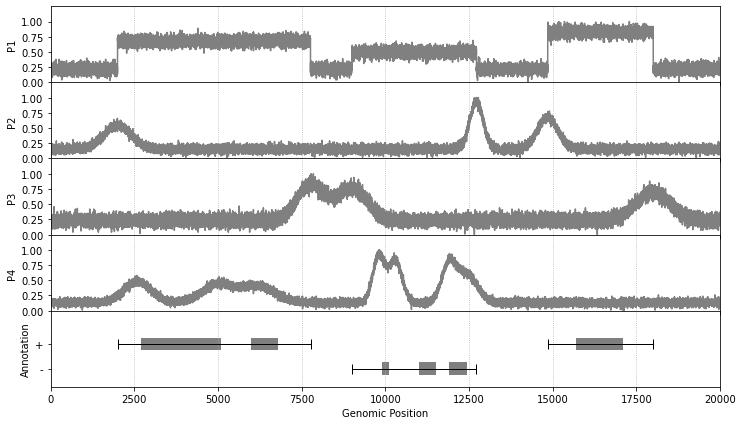

In [1]:
# Data Visualisation of RNA Binding Protein Data and Genomic Annotations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#set x axis range
t = np.arange(0, 20000, 1)

#initialize i to 0
i = 0
############################################################
#Loading CSV files
############################################################
#Load Annotation CSV file
Genome = pd.read_csv('10_project_data_annotation.csv')

#Load RNA Biniding Protein
Protein = pd.read_csv('10_project_data_signals.csv')

#list of type 'transcript' of Gene A, B, & C
onlyTranscript = Genome[Genome['type'].str.contains('transcript')]
#Make list with start, stop and Strand type for plotting transcript of Genes A, B, & C
Transcriptlist = onlyTranscript[['start','stop','strand']]

#list of Exon with strands of Gene A, B, & C
Genome['diff'] = Genome['stop'] - Genome['start']  #Difference of Start and Stop is required to plot broken bars
onlyExon = Genome[Genome['type'].str.contains('exon')]
Exonlist = onlyExon[['start', 'diff', 'strand']]

############################################################
#Version 1
############################################################
fig, axs = plt.subplots(5, 1, sharex=True)
#Remove horizontal space between axes
fig.set_size_inches(12,7)
fig.subplots_adjust(hspace=0)

#Plot Protein data in different subplots
for P in Protein.columns:
    axs[i].plot(t, Protein[[P]], color='gray')
    axs[i].set_yticks(np.arange(0.0, 1.25, 0.25))   #set y-axis incremental step points
    axs[i].set_ylim(0, 1.25)                        #set y-axis limit
    axs[i].xaxis.grid(linestyle=':')                #vertical grid line style
    axs[i].set_ylabel(P)                            #set y-axis label
    i += 1                                          #increment i to move to next subplot

#Plot Genomic Annotation in two steps
    # Step 1: Plot transcript
for rows in range(len(Transcriptlist)):
    if Transcriptlist.iloc[rows,2] == '+':        #check if Strand is '+' the choose y-axis setpoint for strand as 0.7 & for '-' y = 0.3
        y = 0.7
    elif Transcriptlist.iloc[rows,2] == '-':
        y = 0.3
    verts = [(Transcriptlist.iloc[rows,0], y), (Transcriptlist.iloc[rows,1], y)]
    xs, ys = zip(*verts)
    axs[i].plot(xs, ys, '|-', lw=1, color='black', ms=10)
    
axs[i].set_ylim(0, 1.25)                 # y-axis Limits
axs[i].set_xlim(0, 20000)                # x-axis Limits
axs[i].set_xlabel('Genomic Position')    # x-axis label
axs[i].set_ylabel('Annotation')          # y-axis label for Genomic Annotation Plot
axs[i].set_yticks([0.3, 0.7])            # y-axis set points for strands + and -
axs[i].set_yticklabels(['-', '+'])       # y-axis labels
axs[i].xaxis.grid(linestyle=':')         # vertical grid line style

   # Step 2: Plot Exon data
for rows in range(len(Exonlist)):
    if Exonlist.iloc[rows,2] == '+':
        y = 0.6        #set y-axis point from where the bar fills based on Strand
        height = 0.2    #set thickness of bar for 0.2 units
    elif Exonlist.iloc[rows,2] == '-':
        y = 0.2        #set y-axis point from where the bar fills based on Strand
        height = 0.2    #set thickness of bar for 0.2 units
    axs[i].broken_barh([(Exonlist.iloc[rows,0], Exonlist.iloc[rows,1])], (y, height), facecolors='tab:gray')

plt.show()


### 1.2: Version 2

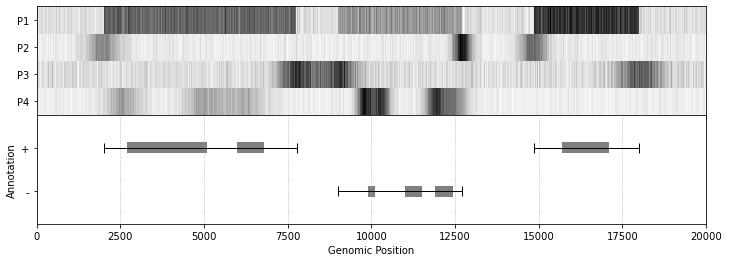

In [2]:
############################################################
#Version 2
############################################################
fig, axs = plt.subplots(2, 1, sharex=True)
#Remove horizontal space between axes
fig.set_size_inches(12,4)
fig.subplots_adjust(hspace=0)
fig.set_size_inches(12,4)

#Re-intialize i=0
i = 0

#Reorder Coloumns in RNA Binding Data to P4, P3, P2, P1 for Ploting
Protein_new = Protein[['P4', 'P3', 'P2', 'P1']]

#Plot Protein data in different subplots
Protein_new = np.transpose(Protein_new) #Transpose Protein Strands to match dimensions while using pcolormesh

x = np.arange(-0.5, 20000, 1)  # length = 20001
y = np.arange(-0.5, 4.5, 1)  # length = 5

axs[i].pcolormesh(x, y, Protein_new, cmap='Greys')     #Plot color map
axs[i].set_yticks([0.0, 1.0, 2.0, 3.0])            # y-axis set points for P1, P2, P3 and P4
axs[i].set_yticklabels(['P4', 'P3', 'P2', 'P1'])   # y-axis labels

#increment i=1 to plot next subplot
i += 1

#Plot Genomic Annotation in two steps
    # Step 1: Plot transcript
for rows in range(len(Transcriptlist)):
    if Transcriptlist.iloc[rows,2] == '+':        #check if Strand is '+' then choose y-axis setpoint for strand as 0.7 & for '-' y = 0.3
        y = 0.7
    elif Transcriptlist.iloc[rows,2] == '-':
        y = 0.3
    verts = [(Transcriptlist.iloc[rows,0], y), (Transcriptlist.iloc[rows,1], y)]
    xs, ys = zip(*verts)
    axs[i].plot(xs, ys, '|-', lw=1, color='black', ms=10)
    
axs[i].set_ylim(0, 1)                    # y-axis Limits
axs[i].set_xlim(0, 20000)                # x-axis Limits
axs[i].set_xlabel('Genomic Position')    # x-axis label
axs[i].set_ylabel('Annotation')          # y-axis label for Genomic Annotation Plot
axs[i].set_yticks([0.3, 0.7])            # y-axis set points for strands + and -
axs[i].set_yticklabels(['-', '+'])       # y-axis labels
axs[i].xaxis.grid(linestyle=':')         # vertical grid line style

# Step 2: Plot Exon data
for rows in range(len(Exonlist)):
    if Exonlist.iloc[rows,2] == '+':
        y = 0.65            #set y-axis point from where the bar fills based on Strand
        height = 0.1        #set thickness of bar for 0.1 units
    elif Exonlist.iloc[rows,2] == '-':
        y = 0.25           #set y-axis point from where the bar fills based on Strand
        height = 0.1       #set thickness of bar for 0.1 units
    axs[i].broken_barh([(Exonlist.iloc[rows,0], Exonlist.iloc[rows,1])], (y, height), facecolors='tab:gray')

plt.show()

### 1.3: Version 3

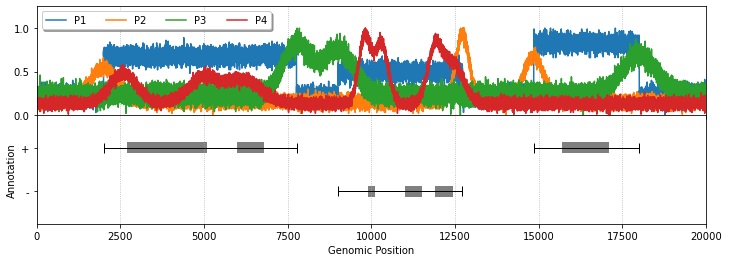

In [3]:
############################################################
#Version 3
############################################################
fig, axs = plt.subplots(2, 1, sharex=True)
#Remove horizontal space between axes
fig.set_size_inches(12,4)
fig.subplots_adjust(hspace=0)

#Plot Protein data in different subplots
for P in Protein.columns:
    #Re-initialize i to 0
    i = 0
    axs[i].plot(t, Protein[[P]], label=P)
    axs[i].set_yticks(np.arange(0.0, 1.25, 0.5))           #set y-axis incremental step points
    axs[i].set_ylim(0, 1.25)                               #set y-axis limit
    axs[i].xaxis.grid(linestyle=':')                       #vertical grid line style
    axs[i].legend(loc='upper left', ncol=4, shadow=True)   #add legends to the plot
    i += 1                                                 #increment i to move to next subplot

#Plot Genomic Annotation in two steps
    # Step 1: Plot transcript
for rows in range(len(Transcriptlist)):
    if Transcriptlist.iloc[rows,2] == '+':        #check if Strand is '+' the choose y-axis setpoint for strand as 0.7 & for '-' y = 0.3
        y = 0.7
    elif Transcriptlist.iloc[rows,2] == '-':
        y = 0.3
    verts = [(Transcriptlist.iloc[rows,0], y), (Transcriptlist.iloc[rows,1], y)]
    xs, ys = zip(*verts)
    axs[i].plot(xs, ys, '|-', lw=1, color='black', ms=10)
    
axs[i].set_ylim(0, 1)                    # y-axis Limits
axs[i].set_xlim(0, 20000)                # x-axis Limits
axs[i].set_xlabel('Genomic Position')    # x-axis label
axs[i].set_ylabel('Annotation')          # y-axis label for Genomic Annotation Plot
axs[i].set_yticks([0.3, 0.7])            # y-axis set points for strands + and -
axs[i].set_yticklabels(['-', '+'])       # y-axis labels
axs[i].xaxis.grid(linestyle=':')         # vertical grid line style

# Step 2: Plot Exon data
for rows in range(len(Exonlist)):
    if Exonlist.iloc[rows,2] == '+':
        y = 0.65            #set y-axis point from where the bar fills based on Strand
        height = 0.1        #set thickness of bar for 0.1 units
    elif Exonlist.iloc[rows,2] == '-':
        y = 0.25           #set y-axis point from where the bar fills based on Strand
        height = 0.1       #set thickness of bar for 0.1 units
    axs[i].broken_barh([(Exonlist.iloc[rows,0], Exonlist.iloc[rows,1])], (y, height), facecolors='tab:gray')

plt.show()

### 1.4: Discussion

#### Discuss the pros and cons between the different visualization approaches.

##### *Version 1*

pros:
    
    1.All the RNA bining proteins can be seen properly in individual plots.It gives better understanding and easy sharing of data.
    2.The position and changing of each protein can be seen by looking at the pattern.Trends in the pattern can be easily seen.

cons:
    
    1.We had just 4 proteins. if we have a list of 100 proteins then the graph will be difficult to interpret.
    2.It is taking a lot of space.Woking with more protein will make the graph uncessarily big .

##### *Version 2*


pros:
    
    1.The graph is very concise and precise and easy to interpret.On which RNA position signals for proteins are high can be easily vizualize.
    
cons:
    
    1.It gives us qualitative information and not quantitative.Precise protein signals cant be derived from it but it can be seen when the signals are high and when it is low.
    
##### *Version 3*

pros:
    
    1.It takes up very less space and all protein signals can be seen all at the same time in a single plot

cons:
    
    1.All the graphs are in same plot so it is difficult to read.If we have say 10 proteins or more individual graphs are difficult to visualize.
    
    

## 2: Text Exercise

#### Summarize the article *'Pencil and paper'* by Wong & Kjaergaard. What are the key points? Do not copy and paste from the article. Summarize in your own words.

An alternative name to this article can be given as **"A picture speaks for itself"**.In data visualization one need to understand the data and create various charts , graphs ,pictures which depicts one's understanding towards the data.The various effective tactics for understanding and showing our specific thinking can be words which either is spoken through or written by us will let others see things from the point we want to show them.In contrast to those tactics , the visualization and representation of data demands reasoning skills by scrutinizing our undertanding or interpretation.

An example of intracellular protein is given to understand the vagenuess of the word which is not expanded to pictures.In one case where the simple word of intracellular protein speaks about how the protein resides inside the cell , whereas in other if we want to depict the intracellular protein via pictures we need to show the exact compartments where the protein lies and it will give us more information and precise location of the protein and where it resides.

Evaluation is necessary in visual depiction for the establishment of our understanding.some amount of visual inaccuracy is being demand while making pictures. Alternative ideas and conclusion may be generated and exposing gaps in our ideas from quick doddlings.Our constant efforts to make an object look like itself seeks for perfection and technical mastery which discourages people and eventually they give up drawing instead of exploring various new possibilities.

The pencil and paper approach provies an immidiate medium to let our ideas flow. Computer softwares dont provide that flexibility in exploring ideas and often stick to a learning curve which stop us to do something when we are concered whether or not we are doing it in the right way.Thinking and drawing are interlinked process where mindsets help us get different insites to the data.Drawing has been known as a cognitive process which improves sintific concepts and performance of children from the kindergarden.

Drawing help us challenge our working memory.The visual attributes of various objects and their complex relationship are not easy to remember but by creating a diagram can help us overcome this. 
Example of Ronald vale is given which proves the point that how sketching and drawing has contributed towards science.Visualization is a very creative scientific process connecting exploring, understanding, seeing and thinking.




